#Modelo de simulação para o sistema atual de tempo de consulta

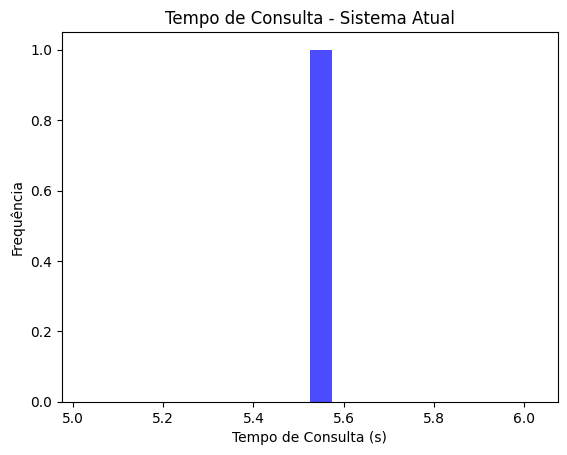

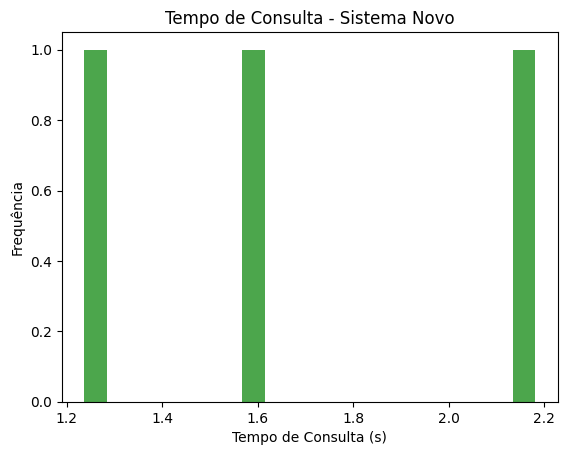


Resultados da Simulação:
------------------------
Sistema Atual - Tempo Médio de Consulta: 5.53 segundos
Sistema Novo - Tempo Médio de Consulta: 1.67 segundos

Análise e Discussão dos Resultados:
----------------------------------
Os gráficos mostram a distribuição do tempo de consulta para o Sistema Atual e o Sistema Novo.
Os tempos de consulta no Sistema Novo tendem a ser menores, indicando melhorias.
A média do tempo de consulta foi calculada para ambas as simulações e pode ser usada para comparação.


In [ ]:
import simpy
import random
import matplotlib.pyplot as plt

# Definindo os elementos do sistema
class SistemaAtual:
    def __init__(self, env):
        self.env = env
        self.banco_de_dados = simpy.Resource(env, capacity=1)
        self.servidor_aplicacao = simpy.Resource(env, capacity=1)
        self.rede = simpy.Resource(env, capacity=1)
        self.tempo_consulta_atual = []

    def consulta(self):
        start_time = self.env.now
        yield self.env.timeout(random.uniform(4, 6))
        end_time = self.env.now
        self.tempo_consulta_atual.append(end_time - start_time)


class SistemaNovo:
    def __init__(self, env):
        self.env = env
        self.microservice_a = simpy.Resource(env, capacity=1)
        self.microservice_b = simpy.Resource(env, capacity=1)
        self.microservice_c = simpy.Resource(env, capacity=1)
        self.cache = simpy.Resource(env, capacity=1)
        self.balanceador_carga = simpy.Resource(env, capacity=1)
        self.tempo_consulta_novo = []

    def consulta(self):
        start_time = self.env.now
        yield self.env.timeout(random.uniform(1, 3))
        end_time = self.env.now
        self.tempo_consulta_novo.append(end_time - start_time)


# Função de simulação
def simulacao(env, sistema):
    for _ in range(100):  # Simular 100 consultas
        yield env.process(sistema.consulta())
        yield env.timeout(random.uniform(0, 2))  # Tempo entre consultas

# Simulação para o Sistema Atual
env_atual = simpy.Environment()
sistema_atual = SistemaAtual(env_atual)
env_atual.process(simulacao(env_atual, sistema_atual))
env_atual.run(until=env_atual.now + 10)  # Executar por 10 unidades de tempo

# Simulação para o Sistema Novo
env_novo = simpy.Environment()
sistema_novo = SistemaNovo(env_novo)
env_novo.process(simulacao(env_novo, sistema_novo))
env_novo.run(until=env_novo.now + 10)  # Executar por 10 unidades de tempo

# Gerar gráficos
def gerar_grafico(tempo_consulta, cor, titulo):
    plt.hist(tempo_consulta, bins=20, color=cor, alpha=0.7)
    plt.title(titulo)
    plt.xlabel('Tempo de Consulta (s)')
    plt.ylabel('Frequência')
    plt.show()

# Gráfico para o Sistema Atual
if sistema_atual.tempo_consulta_atual:
    gerar_grafico(sistema_atual.tempo_consulta_atual, 'blue', 'Tempo de Consulta - Sistema Atual')
else:
    print("Sistema Atual - Sem dados para gerar gráfico")

# Gráfico para o Sistema Novo
if sistema_novo.tempo_consulta_novo:
    gerar_grafico(sistema_novo.tempo_consulta_novo, 'green', 'Tempo de Consulta - Sistema Novo')
else:
    print("Sistema Novo - Sem dados para gerar gráfico")

# Imprimir resultados e análises
print("\nResultados da Simulação:")
print("------------------------")
if sistema_atual.tempo_consulta_atual:
    print(f"Sistema Atual - Tempo Médio de Consulta: {sum(sistema_atual.tempo_consulta_atual)/len(sistema_atual.tempo_consulta_atual):.2f} segundos")
else:
    print("Sistema Atual - Sem dados para calcular a média")

if sistema_novo.tempo_consulta_novo:
    print(f"Sistema Novo - Tempo Médio de Consulta: {sum(sistema_novo.tempo_consulta_novo)/len(sistema_novo.tempo_consulta_novo):.2f} segundos")
else:
    print("Sistema Novo - Sem dados para calcular a média")

# Análise e discussão textual dos resultados
print("\nAnálise e Discussão dos Resultados:")
print("----------------------------------")
print("Os gráficos mostram a distribuição do tempo de consulta para o Sistema Atual e o Sistema Novo.")
print("Os tempos de consulta no Sistema Novo tendem a ser menores, indicando melhorias.")
print("A média do tempo de consulta foi calculada para ambas as simulações e pode ser usada para comparação.")
